# Jupyther Notebook for testing Bodeplots

## PT1

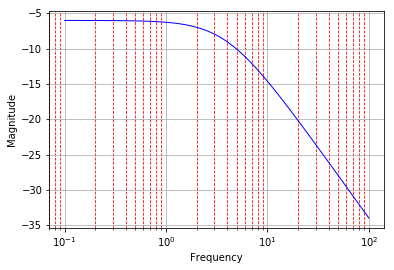

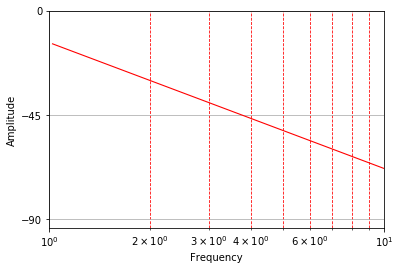

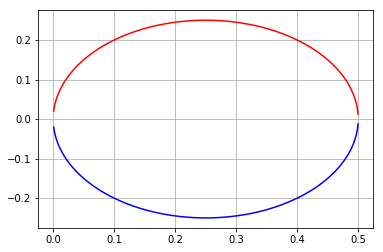

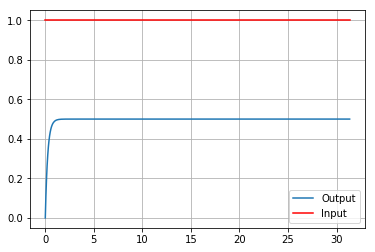

In [14]:
#
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)

# PT1 - Glied
 
# Coefficients in numerator of transfer function
num = [2] #Zähler
# Coefficients in denominator of transfer function
# High order to low order, eg 1*s^2 + 0.1*s + 1
#m=0
#D=1
#kc=1
#den = [m, D, kc] #Nenner
den = [1,4]

#Do not touch!
f1 = plt.figure()
s1 = signal.lti(num, den)
w, mag, phase = signal.bode(s1)
plt.semilogx (w, mag, color="blue", linewidth="1")
plt.xlabel ("Frequency")
plt.ylabel ("Magnitude")
plt.grid()
plt.grid(b=True, which='minor', color='r', linestyle='--')

 
plt.figure()
s1 = signal.lti(num, den)
w, mag, phase = signal.bode(s1,w=np.logspace(10**(-2),10**4,10000))
plt.semilogx (w, phase, color="red", linewidth="1.1")
plt.xlabel ("Frequency")
plt.ylabel ("Amplitude")
plt.yticks([-90,-45,0])
plt.grid()
plt.grid(b=True, which='minor', color='r', linestyle='--')

# Nyquist plot
w, H = signal.freqresp(s1)
plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.grid()
plt.show()

#time response
w_sim =  1
#response
t = np.arange(0, 5*2*np.pi/(w_sim),.01*2*np.pi/(w_sim))
#u = np.sin(w_sim*t) #Sinus am Eingang
u = np.ones_like(t) #Sprungantwort am Eingang
tout, y, x = signal.lsim(s1, u, t)
plt.figure()
plt.grid()
plt.grid(which='minor', color='r', linestyle='--')
plt.plot(t, y)
plt.plot(t, u,'-r')
plt.legend(['Output','Input'])

## PT2

sigma = 0.1
w0 = 0.99498743710662
T0 = 6.314838833996553
ue = 0.7292476142876709
wrz = 0.9899494936611666
uerz = 5.02518907629606


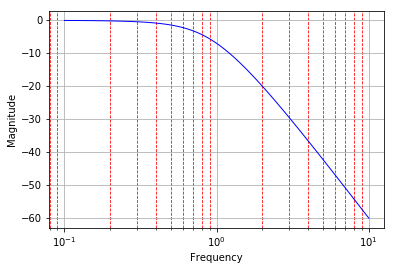

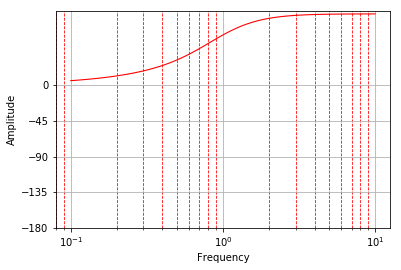

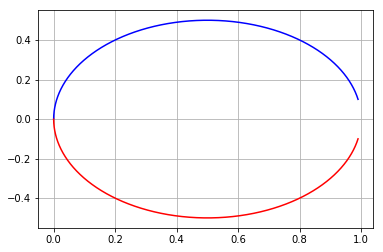

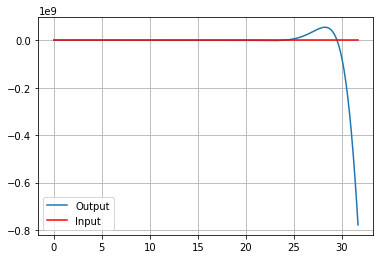

In [17]:
# PT2 - Glied
 
# Coefficients in numerator of transfer function
k = 1
#num = [k]
num = [1]
# Coefficients in denominator of transfer function
# High order to low order, eg 1*s^2 + 0.1*s + 1
wn=1
D=0.1
#D=1/(2*np.sqrt(2))
#den = [1/wn**2, 2*D/wn, 1]
den = [1,0,-1,1]


# Do not touch!
sigma = D*wn
print('sigma = ' + str(sigma))

w0 = wn*np.sqrt(1-D**2)
print('w0 = ' + str(w0))

T0 = 2*np.pi/w0
print('T0 = ' + str(T0))

ue = np.exp(-np.pi*D/(np.sqrt(1-D**2)))
print('ue = ' + str(ue))

wrz = wn*np.sqrt(1-2*D**2)
print('wrz = ' + str(wrz))

uerz = 1/(2*D*np.sqrt(1-D**2))
print('uerz = ' + str(uerz))

f1 = plt.figure()
s1 = signal.lti(num, den)
w, mag, phase = signal.bode(s1)
plt.semilogx (w, mag, color="blue", linewidth="1")
plt.xlabel ("Frequency")
plt.ylabel ("Magnitude")
plt.grid()
plt.grid(b=True, which='minor', color='r', linestyle='--')

 
plt.figure()
s1 = signal.lti(num, den)
w, mag, phase = signal.bode(s1)
plt.semilogx (w, phase, color="red", linewidth="1.1")
plt.xlabel ("Frequency")
plt.ylabel ("Amplitude")
plt.yticks([-180,-135,-90,-45,0])
plt.grid()
plt.grid(b=True, which='minor', color='r', linestyle='--')

# Nyquist plot
w, H = signal.freqresp(s1)
plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.grid()
plt.show()

#time response
w_sim =  wrz
#response
t = np.arange(0, 5*2*np.pi/(w_sim),.01*2*np.pi/(w_sim))
u = np.sin(w_sim*t) #Sinus am Eingang
#u = np.ones_like(t) #Sprungantwort am Eingang
tout, y, x = signal.lsim(s1, u, t)
plt.figure()
plt.grid()
plt.grid(which='minor', color='r', linestyle='--')
plt.plot(t, y)
plt.plot(t, u,'-r')
plt.legend(['Output','Input'])